<a href="https://colab.research.google.com/github/jiorjioo/KelasMahir-3.0/blob/main/10.%202000018257_K_Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
dataset = pd.read_csv('Super-Store-Dataset.csv')
dataset

,order_id,order_date,customer_id,segment,category,sub_category,sales,quantity,profit
0,CA-2016-152156,11/8/2016,CG-12520,Consumer,Furniture,Bookcases,261.9600,2,41.9136
1,CA-2016-152156,11/8/2016,CG-12520,Consumer,Furniture,Chairs,731.9400,3,219.5820
2,CA-2016-138688,6/12/2016,DV-13045,Corporate,Office Supplies,Labels,14.6200,2,6.8714
3,US-2015-108966,10/11/2015,SO-20335,Consumer,Furniture,Tables,957.5775,5,-383.0310
4,US-2015-108966,10/11/2015,SO-20335,Consumer,Office Supplies,Storage,22.3680,2,2.5164
...,...,...,...,...,...,...,...,...,...
9983,CA-2014-110422,1/21/2014,TB-21400,Consumer,Furniture,Furnishings,25.2480,3,4.1028
9984,CA-2017-121258,2/26/2017,DB-13060,Consumer,Furniture,Furnishings,91.9600,2,15.6332
9985,CA-2017-121258,2/26/2017,DB-13060,Consumer,Technology,Phones,258.5760,2,19.3932
9986,CA-2017-121258,2/26/2017,DB-13060,Consumer,Office Supplies,Paper,29.6000,4,13.3200


In [80]:
# MEMFILTER DATASET YANG DIINGINKAN

# Melakukan slicing pada dataset dengan category = office supplies,sub category = art, dan segment = consumer
# Alasan: ingin melihat sebaran data di kategori alat-alat seni segmentasi pasar Consumer

dataset_ok = dataset[(dataset['category']=='Office Supplies') & (dataset['sub_category']=='Art') & (dataset['segment']=='Consumer')]
data = pd.DataFrame(dataset_ok.head(15))
data
# print(sum(dataset_ok.profit))

,order_id,order_date,customer_id,segment,category,sub_category,sales,quantity,profit
6,CA-2014-115812,6/9/2014,BH-11710,Consumer,Office Supplies,Art,7.280,4,1.9656
18,CA-2014-143336,8/27/2014,ZD-21925,Consumer,Office Supplies,Art,8.560,2,2.4824
31,US-2015-150630,9/17/2015,TB-21520,Consumer,Office Supplies,Art,86.304,6,9.7092
33,US-2015-150630,9/17/2015,TB-21520,Consumer,Office Supplies,Art,15.760,2,3.5460
61,CA-2016-111682,6/17/2016,TB-21055,Consumer,Office Supplies,Art,1.680,1,0.8400
81,CA-2014-139451,10/12/2014,DN-13690,Consumer,Office Supplies,Art,14.900,5,4.1720
108,CA-2017-119004,11/23/2017,JM-15250,Consumer,Office Supplies,Art,3.304,1,1.0738
111,CA-2016-128867,11/3/2016,CL-12565,Consumer,Office Supplies,Art,75.960,2,22.7880
135,CA-2016-145583,10/13/2016,LC-16885,Consumer,Office Supplies,Art,11.520,4,3.4560
164,CA-2014-139892,9/8/2014,BM-11140,Consumer,Office Supplies,Art,9.936,3,2.7324


In [81]:
df = pd.DataFrame({"x1":data.sales, "x2":data.quantity, "x3":data.profit})
df.dtypes
df

,x1,x2,x3
6,7.280,4,1.9656
18,8.560,2,2.4824
31,86.304,6,9.7092
33,15.760,2,3.5460
61,1.680,1,0.8400
81,14.900,5,4.1720
108,3.304,1,1.0738
111,75.960,2,22.7880
135,11.520,4,3.4560
164,9.936,3,2.7324


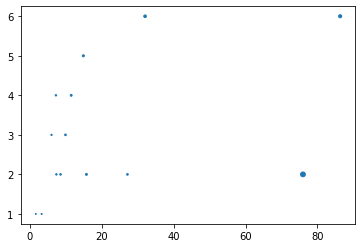

In [82]:
plt.scatter(df.x1, df.x2, df.x3)

In [169]:
k = 3
pusat_klaster = np.array([[7.280, 4, 1.9656],[8.560, 2, 2.4824]])
pusat_klaster

array([[7.28  , 4.    , 1.9656],
       [8.56  , 2.    , 2.4824]])

In [101]:
import random
def pusat_klaster_awal(k, df):
    X=np.array(df)
    n=len(X)
    list_1=np.arange(0,n)
    pusat_klaster_index = random.choices(list_1, k=k)
    pusat_klaster=X[pusat_klaster_index]
    return pusat_klaster

In [102]:
def jarak_euclidean(x,y):
    return np.sqrt(sum(pow(a-b, 2) for a, b in zip(x,y)))

In [103]:
def jarak_centroid_euclidean(df,pusat_klaster):
    n=len(df)
    k=np.array(pusat_klaster).shape[0]
    jarak=[]
    for i in range(n):
        x = list(df.iloc[i,::])
        jrk = [jarak_euclidean(x, pusat_klaster[j]) for j in range(k)]
        jarak.append(jrk)
    return jarak

In [170]:
jarak_centroid=jarak_centroid_euclidean(df, pusat_klaster)
jarak_centroid

[[0.0, 2.4301197995160653],
 [2.4301197995160653, 0.0],
 [79.42767727284992, 78.18155904201451],
 [8.85483281378028, 7.278134717082392],
 [6.451897035756228, 7.143659969511427],
 [7.995786450374972, 7.214592723085621],
 [5.060027988064888, 5.53260245815656],
 [71.79494927750837, 70.39231059824644],
 [4.49431776357658, 3.7026337869143897],
 [2.9397820055235386, 1.7192661225069255],
 [25.332780344841737, 24.232154453122817],
 [2.143997024251666, 1.7210235210478684],
 [1.6311676799152204, 2.847948566951308],
 [20.002420989470252, 18.609476278498548],
 [2.143997024251666, 1.7210235210478684]]

In [157]:
def menentukan_klaster(jarak_centroid):
    n=len(jarak_centroid)
    label_klaster=list()
    for i in range(n):
        max_val, idx = min((val, idx) for (idx, val) in enumerate(jarak_centroid[i]))
        label_klaster.append(idx)
    return label_klaster

In [184]:
klaster=menentukan_klaster(jarak_centroid)
klaster

[0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1]

In [107]:
def menghitung_pusat_klaster(df, klaster):
    df['label']=klaster
    pusat_barudf=df.groupby('label', as_index=False).mean()
    pusat_barudf=pusat_barudf.iloc[::,1:]
    pusat_klaster_baru=np.array(pusat_barudf)
    return pusat_klaster_baru

In [183]:
pusat_klaster_baru=menghitung_pusat_klaster(df, klaster)
pusat_klaster_baru

array([[11.772     ,  2.84615385,  2.59952308],
       [81.132     ,  4.        , 16.2486    ]])

In [109]:
def perubahan_pusat_klaster_euclidean(pusat_klaster_lama, pusat_klaster_baru):
    perubahan = 0
    for a,b in zip(pusat_klaster_lama, pusat_klaster_baru):
        perubahan+=jarak_euclidean(a,b)
    return perubahan

In [173]:
perubahan_pusat_klaster_euclidean(pusat_klaster, pusat_klaster_baru)

22.006699916070247

In [185]:
# PERBARUI LGI

pusat_klaster = np.array([[75.960, 2, 22.7880],[11.520, 4, 3.4560]])
print(pusat_klaster)
print(jarak_centroid)
print(klaster)
print(pusat_klaster_baru)
print(perubahan_pusat_klaster_euclidean(pusat_klaster, pusat_klaster_baru))

[[75.96   2.    22.788]
 [11.52   4.     3.456]]
[[0.0, 2.4301197995160653], [2.4301197995160653, 0.0], [79.42767727284992, 78.18155904201451], [8.85483281378028, 7.278134717082392], [6.451897035756228, 7.143659969511427], [7.995786450374972, 7.214592723085621], [5.060027988064888, 5.53260245815656], [71.79494927750837, 70.39231059824644], [4.49431776357658, 3.7026337869143897], [2.9397820055235386, 1.7192661225069255], [25.332780344841737, 24.232154453122817], [2.143997024251666, 1.7210235210478684], [1.6311676799152204, 2.847948566951308], [20.002420989470252, 18.609476278498548], [2.143997024251666, 1.7210235210478684]]
[0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1]
[[11.772       2.84615385  2.59952308]
 [81.132       4.         16.2486    ]]
138.07100088444494


##Fungsi K Means Clustering

In [138]:
def plot_klaster(X, klaster, pusat_klaster):
    dataa = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=klaster))
    colors = {0:'blue', 1:'orange', 2:'green'}
    fig, ax = plt.subplots(figsize=(8, 8))
    grouped = dataa.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    ax.scatter(pusat_klaster[:, 0], pusat_klaster[:, 1], marker='^', s=150, c='#ff2222')
    plt.xlabel('X_1')
    plt.ylabel('X_2')
    plt.show()


In [195]:
def k_means(k, dataa):
    X=np.array(dataa)
    pusat_klaster_lama = pusat_klaster_awal(k, X)
    klaster = [0]*len(X)
    epsilon = 100
    iterasi = -1
    while epsilon>.001:
        jarak_ke_pusat_klaster=jarak_centroid_euclidean(dataa,pusat_klaster_lama)
        klaster = menentukan_klaster(jarak_ke_pusat_klaster)
        plot_klaster(X, klaster, pusat_klaster_lama)
        pusat_klaster_baru = menghitung_pusat_klaster(dataa, klaster)
        epsilon = perubahan_pusat_klaster_euclidean(pusat_klaster_lama, pusat_klaster_baru)
        pusat_klaster_lama = pusat_klaster_baru
        iterasi += 1
    return iterasi, klaster, pusat_klaster_baru

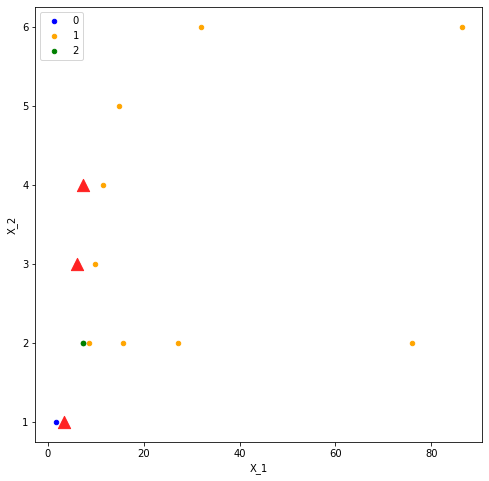

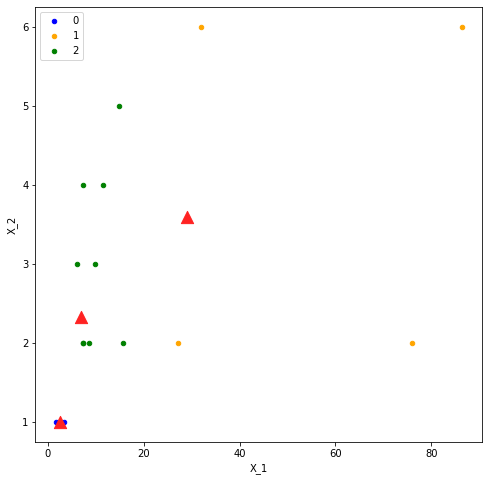

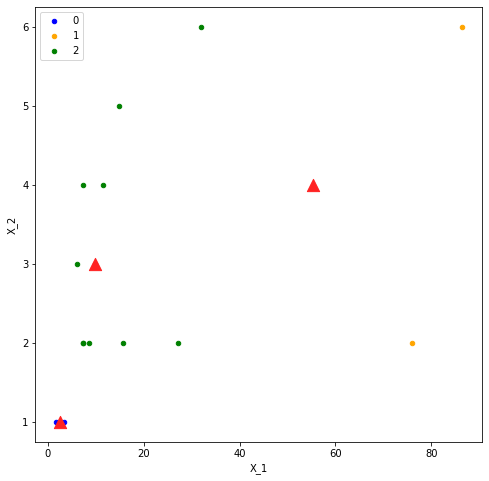

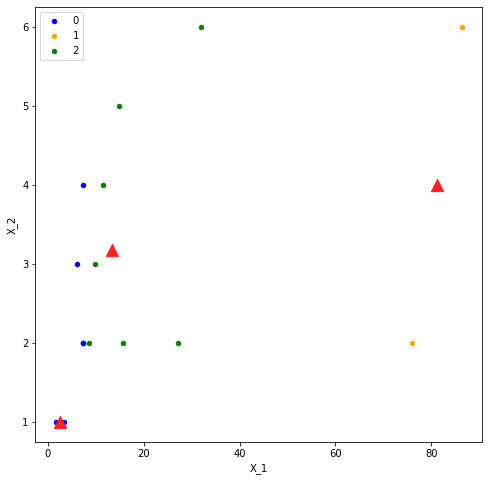

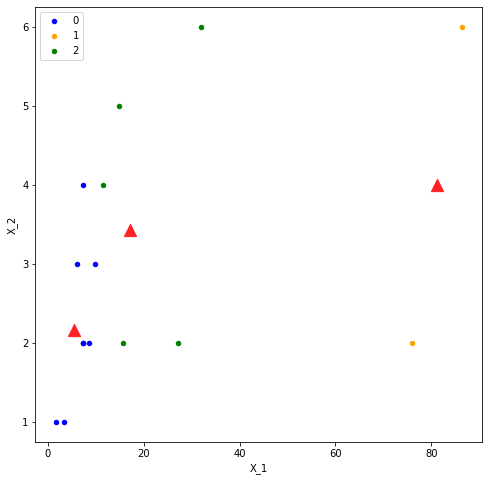

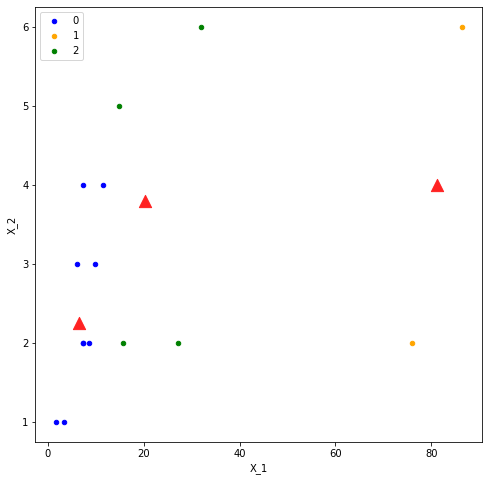

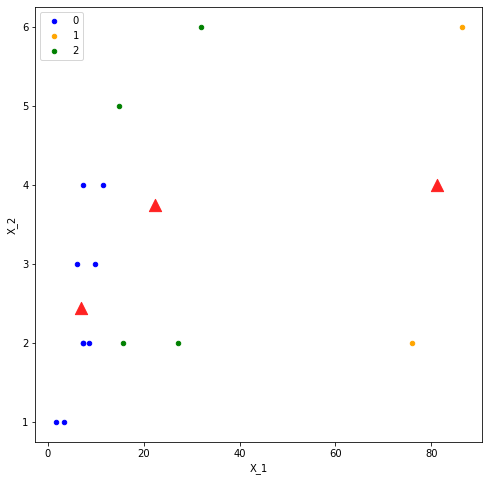

In [196]:
iterasi, klaster, pusat_klaster= k_means(3, df)

In [191]:
pusat_klaster

array([[ 7.016     ,  2.44444444,  1.83837778],
       [81.132     ,  4.        , 16.2486    ],
       [22.473     ,  3.75      ,  4.3121    ]])

In [197]:
# Membuat data set hasil pengclusteran

data_new = pd.DataFrame({"x1":data.sales, "x2":data.quantity, "x3":data.profit, "klaster": klaster})
data_new.to_csv('klasterisasi_data_retail.csv', index = False)
data_new

,x1,x2,x3,klaster
6,7.280,4,1.9656,0
18,8.560,2,2.4824,0
31,86.304,6,9.7092,1
33,15.760,2,3.5460,2
61,1.680,1,0.8400,0
81,14.900,5,4.1720,2
108,3.304,1,1.0738,0
111,75.960,2,22.7880,1
135,11.520,4,3.4560,0
164,9.936,3,2.7324,0


Sepertinya karena sampel data yang saya ambil terlalu acak sehingga agak kurang bisa menjelaskan maksud yang saya inginkan. Pada intinya kurang lebih segmentasinya seperti itu :D